# 셀프 주유소는 정말 저렴할까?

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 서울시 구별 주유소 가격 정보 얻기

In [2]:
driver = webdriver.Chrome('./chromedriver')
#driver.maximize_window()
driver.get('https://www.opinet.co.kr/user/main/mainView.do')
time.sleep(1)
driver.find_element_by_css_selector('.ic_m1').click()
time.sleep(2)
region = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = region.find_elements_by_tag_name('option')
gu_names = [gu.get_attribute('value') for gu in gu_list]
del gu_names[0]

In [3]:
# 25개 자치구에 대해서 엑셀 다운로드
for gu in gu_names:
    region = driver.find_element_by_id("SIGUNGU_NM0")
    region.send_keys(gu)
    time.sleep(1)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)

In [4]:
driver.quit()

### 구별 휘발유 가격에 대한 데이터 정리

In [5]:
import pandas as pd 
from glob import glob

In [6]:
glob('./station_data/지역*.xls')

['./station_data\\지역_위치별(주유소) (1).xls',
 './station_data\\지역_위치별(주유소) (10).xls',
 './station_data\\지역_위치별(주유소) (11).xls',
 './station_data\\지역_위치별(주유소) (12).xls',
 './station_data\\지역_위치별(주유소) (13).xls',
 './station_data\\지역_위치별(주유소) (14).xls',
 './station_data\\지역_위치별(주유소) (15).xls',
 './station_data\\지역_위치별(주유소) (16).xls',
 './station_data\\지역_위치별(주유소) (17).xls',
 './station_data\\지역_위치별(주유소) (18).xls',
 './station_data\\지역_위치별(주유소) (19).xls',
 './station_data\\지역_위치별(주유소) (2).xls',
 './station_data\\지역_위치별(주유소) (20).xls',
 './station_data\\지역_위치별(주유소) (21).xls',
 './station_data\\지역_위치별(주유소) (22).xls',
 './station_data\\지역_위치별(주유소) (23).xls',
 './station_data\\지역_위치별(주유소) (24).xls',
 './station_data\\지역_위치별(주유소) (3).xls',
 './station_data\\지역_위치별(주유소) (4).xls',
 './station_data\\지역_위치별(주유소) (5).xls',
 './station_data\\지역_위치별(주유소) (6).xls',
 './station_data\\지역_위치별(주유소) (7).xls',
 './station_data\\지역_위치별(주유소) (8).xls',
 './station_data\\지역_위치별(주유소) (9).xls',
 './station_data\\지역_위치별(

In [7]:
df = pd.read_excel('./station_data/지역_위치별(주유소).xls', header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1355,1155,-
1,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1537,1359,1154,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1547,1363,1159,-
3,서울특별시,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,GS칼텍스,02-2226-4963,Y,-,1373,1185,-
4,서울특별시,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,1562,1378,1174,1070


In [9]:
station_files = glob('./station_data/지역*.xls')
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [10]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      498 non-null    object
 1   상호      498 non-null    object
 2   주소      498 non-null    object
 3   상표      498 non-null    object
 4   전화번호    498 non-null    object
 5   셀프여부    498 non-null    object
 6   고급휘발유   498 non-null    object
 7   휘발유     498 non-null    object
 8   경유      498 non-null    object
 9   실내등유    498 non-null    object
dtypes: object(10)
memory usage: 42.8+ KB


In [11]:
stations = pd.DataFrame({
    '상호': station_raw['상호'],
    '주소': station_raw['주소'],
    '가격': station_raw['휘발유'],
    '셀프': station_raw['셀프여부'],
    '상표': station_raw['상표']
})
stations.head()

,상호,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1374,N,현대오일뱅크
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1385,N,GS칼텍스
2,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1386,Y,현대오일뱅크
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1395,Y,현대오일뱅크
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1395,Y,SK에너지


In [12]:
stations['구'] = [addr.split()[1] for addr in stations['주소']]
stations.tail()

,상호,주소,가격,셀프,상표,구
35,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,1883,N,GS칼텍스,강남구
36,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1913,N,GS칼텍스,강남구
37,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025,N,SK에너지,강남구
38,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
39,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [13]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [14]:
stations = stations[stations['가격'] != '-']
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      487 non-null    object
 1   주소      487 non-null    object
 2   가격      487 non-null    object
 3   셀프      487 non-null    object
 4   상표      487 non-null    object
 5   구       487 non-null    object
dtypes: object(6)
memory usage: 26.6+ KB


In [15]:
stations['가격'] = pd.to_numeric(stations['가격'])
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      487 non-null    object
 1   주소      487 non-null    object
 2   가격      487 non-null    int64 
 3   셀프      487 non-null    object
 4   상표      487 non-null    object
 5   구       487 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.6+ KB


### 셀프 주유소가 정말 저렴한지 Boxplot으로 확인하기

In [17]:
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

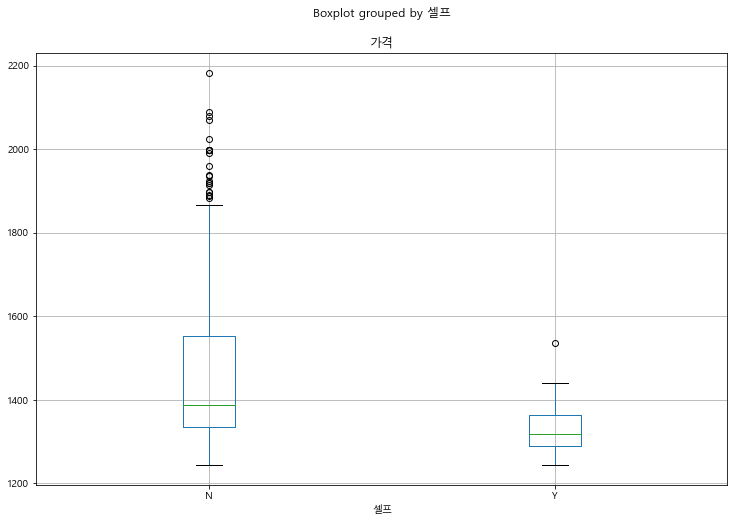

In [18]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

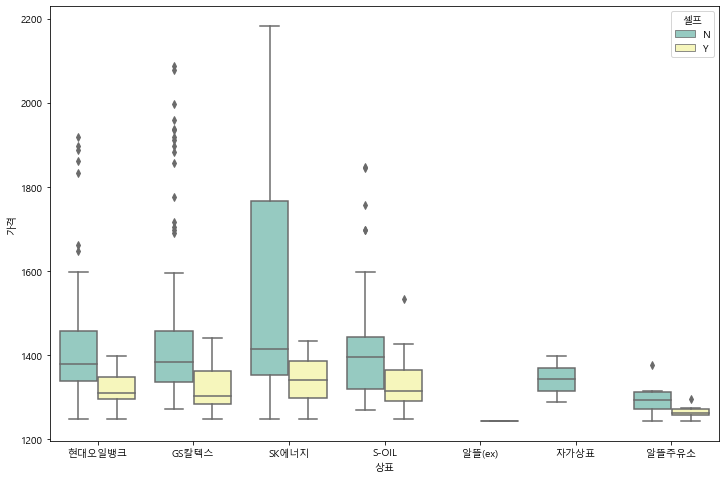

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

### 서울시 구별 휘발유 가격 확인하기

In [20]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
# 휘발유 가격이 비싼 주유소 Top 10
stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2183,N,SK에너지,중구
13,서계주유소,서울 용산구 청파로 367 (서계동),2089,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2079,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2069,N,SK에너지,중구
37,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025,N,SK에너지,강남구
12,에너비스,서울 용산구 한남대로 82 (한남동),1998,N,SK에너지,용산구
7,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998,N,SK에너지,종로구
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998,N,GS칼텍스,종로구
11,한남지점,서울 용산구 한남대로21길 4 (한남동),1998,N,SK에너지,용산구
10,동자동주유소,서울 용산구 한강대로104길 6 (동자동),1990,N,SK에너지,용산구


In [22]:
# 휘발유 가격이 저렴한 주유소 Top 10
stations.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
0,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1243,N,알뜰주유소,강서구
1,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1243,Y,알뜰주유소,강서구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1244,Y,알뜰(ex),서초구
1,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1249,Y,SK에너지,도봉구
3,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1249,N,SK에너지,양천구
2,현대주유소,서울 양천구 남부순환로 372 (신월동),1249,Y,S-OIL,양천구
1,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1249,Y,SK에너지,양천구
0,형산석유(주)원주유소,서울 양천구 남부순환로 408,1249,N,현대오일뱅크,양천구
0,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1249,Y,현대오일뱅크,강북구
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1249,N,현대오일뱅크,도봉구


In [24]:
gu_data = stations['가격'].groupby(stations['구']).mean()
gu_data

구
강남구     1541.052632
강동구     1442.500000
강북구     1281.153846
강서구     1340.090909
관악구     1384.125000
광진구     1341.470588
구로구     1363.681818
금천구     1304.461538
노원구     1371.785714
도봉구     1314.777778
동대문구    1337.190476
동작구     1372.600000
마포구     1460.250000
서대문구    1334.666667
서초구     1439.823529
성동구     1428.941176
성북구     1290.416667
송파구     1371.515152
양천구     1335.153846
영등포구    1440.933333
용산구     1820.214286
은평구     1326.437500
종로구     1701.333333
중구      1841.600000
중랑구     1301.875000
Name: 가격, dtype: float64

In [26]:
import numpy as np 
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'],
                            aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1541.052632
강동구,1442.500000
강북구,1281.153846
강서구,1340.090909
관악구,1384.125000


In [31]:
geo_path = './skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                tiles='Stamen Toner')
map.choropleth(geo_data=geo_data, data=gu_data,
                columns=[gu_data.index, '가격'],
                fill_color = 'PuRd',
                key_on = 'feature.id'
)
map